## matplotlib.pyplot: subplots
---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

uma forma mostrar dois plots ao mesmo tempo, em gráficos diferentes, é nomeando manualmente o objeto, já que, nativamente à biblioteca matplotlib, usa-se `plt`.

para criar o próprio objeto matplotlib é necessário atribuir a um objeto `plt.subplots()`

o objeto `fig` diz respeito à janela que abre para mostrar o gráfico. Já o objeto `ax` diz respeito aos eixos do gráfico e é ele que será usado como o `plt` normalmente é usado, bastando substituir `plt.` por `ax.`

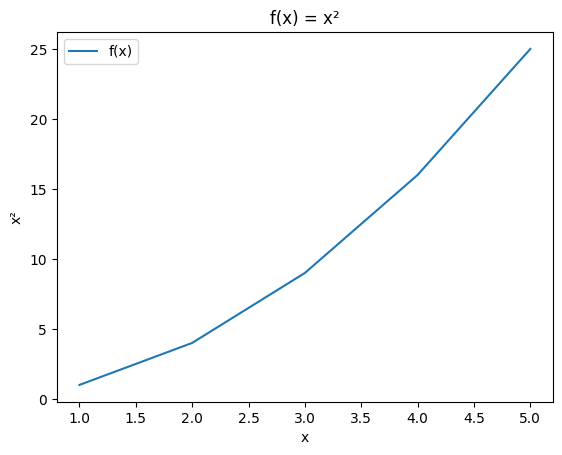

In [7]:
fig, ax = plt.subplots()

x, y = [1, 2, 3, 4, 5], [1, 4, 9, 16, 25]

ax.plot(x, y, label='f(x)')
ax.set_title('f(x) = x²')
ax.set_xlabel('x')
ax.set_ylabel('x²')
ax.legend()

observe que a estrutura principal do código não mudou, apesar de que ao invés de escrever `xlabel()`, `ylabel()` e `title()` como quando usa `plt.`, quando usando um objeto criado manuealmente, neste exemplo `ax.`, essas funções mudam para `set_xlabel()`, `set_ylabel()` e `set_title()`. As demais permanecem inalteradas, inclusive, todos os argumentos e tipos diferentes de gráfico que o objeto nativo `plt.` suporta.

isto é interessante pois é possível plotar eixos diferentes em uma mesma janela, bastando declarar dois eixos através da pacotagem de variáveis:

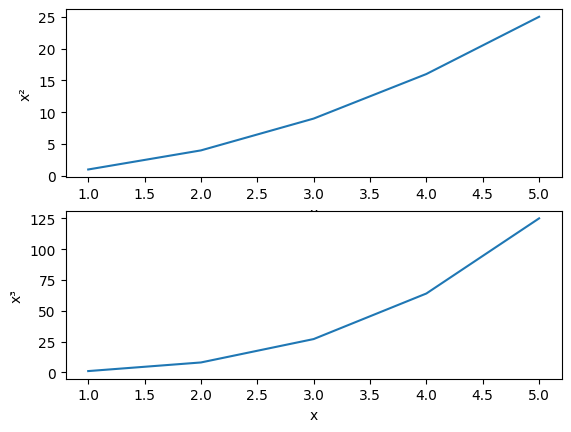

In [4]:
x, y2, y3 = [i for i in range(1, 6)], [i**2 for i in x], [i**3 for i in x]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(x, y2)
ax1.set_xlabel('x')
ax1.set_ylabel('x²')

ax2.plot(x, y3)
ax2.set_xlabel('x')
ax2.set_ylabel('x³')

plt.show()

em `plt.subplot()` foram usados os asgumento `nrows` e `ncols` que nada mais são do que a forma em como a janela deve ser dividida. Neste exemplo, a janela foi divida em duas linhas, por isso `nrows=2`; e, a janela permaneceu com apenas uma coluna, por isso `ncols=1`. No entanto, se houver mais plots que deseje mostrar, a janela pode ser dividida em mais partes ainda.

como o eixo x, em ambos os gráficos, representa a mesma variável, neste exemplo, `x`, pode-se acrescentar o argumento `sharex=True` em `plt.subplots()`, para que este apareça apenas uma vez.

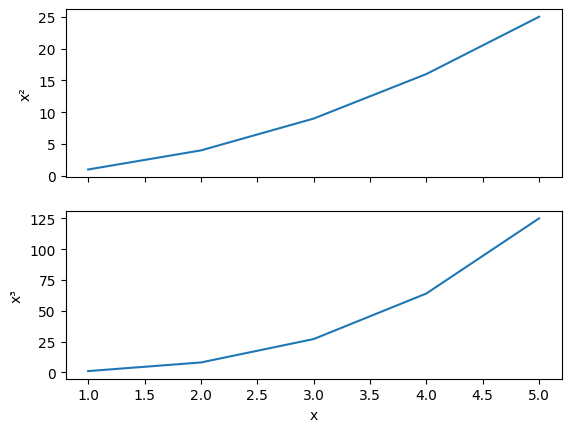

In [5]:
x, y2, y3 = [i for i in range(1, 6)], [i**2 for i in x], [i**3 for i in x]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(x, y2)
ax1.set_ylabel('x²')

ax2.plot(x, y3)
ax2.set_xlabel('x')
ax2.set_ylabel('x³')

plt.show()

o mesmo raciocínio pode ser usado para o eixo y usando `sharey=True`.

`sharey=` e `sharex=` podem, ainda, receber as strings `row`, para compartilhar os valores dos eixos nas linhas, e `col`, para compartilhar os valores dos eixos nas colunas:

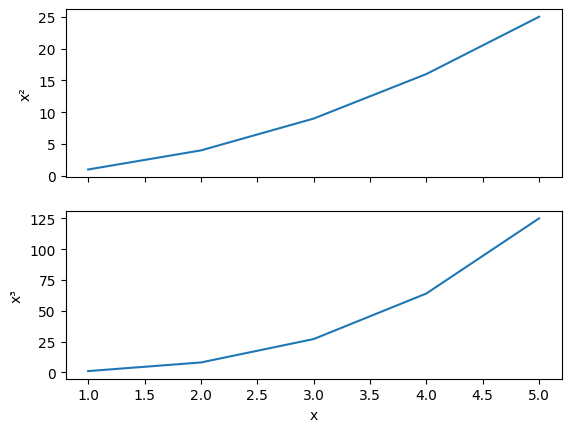

In [49]:
x, y2, y3 = [i for i in range(1, 6)], [i**2 for i in x], [i**3 for i in x]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex='col')

ax1.plot(x, y2)
ax1.set_ylabel('x²')

ax2.plot(x, y3)
ax2.set_xlabel('x')
ax2.set_ylabel('x³')

plt.show()

é possível, ainda, passar a lista de argumentos [esquerda, fundo, largura, altura] como parâmetro em `plt.axes()` para criar uma janela de formato diferente do padrão:

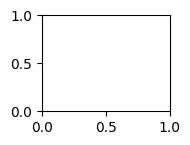

In [8]:
ax = plt.axes([0.65, 0.65, 0.2, 0.2])

esta janela funciona normalmente como as demais, e pode, inclusive, vir dentro de outra:

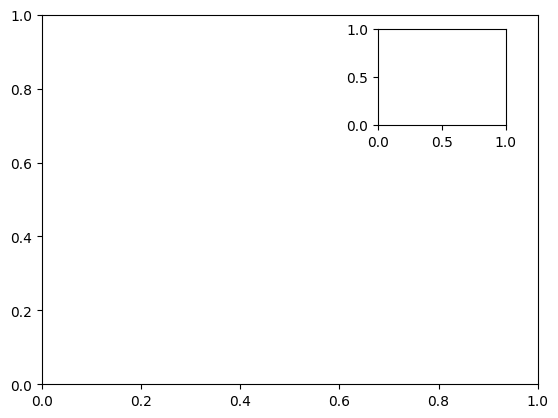

In [9]:
ax1 = plt.axes() 
ax = plt.axes([0.65, 0.65, 0.2, 0.2])

outra forma de fazer isto é através do objeto `.figure()`, usando o método `<obj_figure>.add_axes()`, que, da mesma forma, deve receber aquela lista de argumentos:

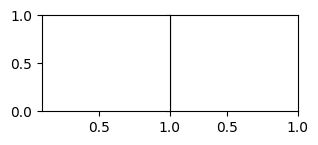

In [29]:
fig = plt.figure()
ax1 = fig.add_axes([0.65, 0.65, 0.2, 0.2], yticklabels=[], xlim=[0.1, 1])
ax2 = fig.add_axes([0.45, 0.65, 0.2, 0.2], xlim=[0.1, 1])

o parâmetro `yticklabels=` recebe uma lista contendo os valores que aparecerão no eixo y, quando passanda uma lista vazia, não aparece nada, logo, é possível juntar as duas janelas.
É possível fazer o mesmo com `xticklabels=`

pode usar o comando `<obj_figure>.subplot_adjust(hspace=<altura>, wspace=<largura>)`, que recebe um valor para altura e largura, ajudando a distanciar melhor as janelas:

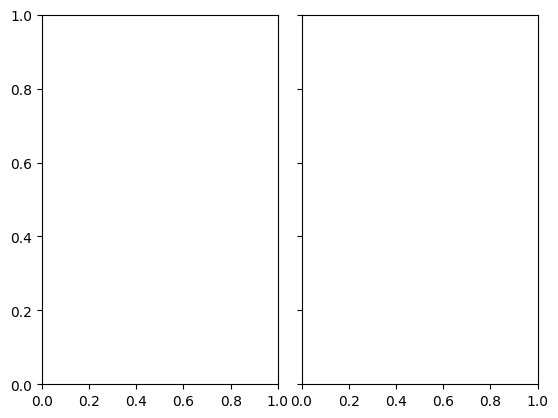

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.subplots_adjust(hspace=10, wspace=0.1)

para criar várias janelas de tamanhos diferentes, deve-se usar a função `.GridSpec()`, que funciona igual `.subplots()`, tendo que passar um número de linhas e de colunas e o tamanho de cada linha e coluna:

In [52]:
grid = plt.GridSpec(nrows=2, ncols=3, wspace=0.4, hspace=0.3)

ou seja, as linhas e colunas se cruzam formando janelas com 40% da largura total e 30% da altura total. A partir daí, deve-se usar a variável `grid`, do exemplo, que é passível de slicing:

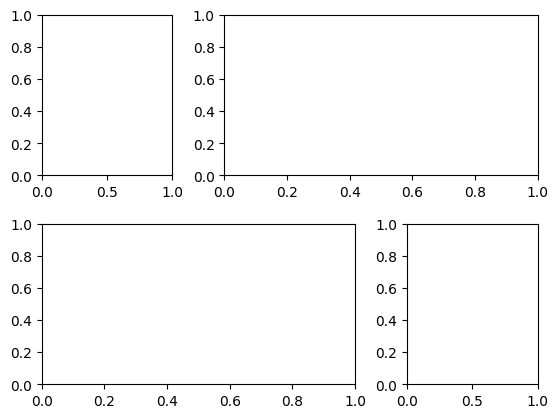

In [53]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

assim, na primeira linha cria-se uma janela na posição [0, 0]; na segunda linha cria-se uma janela que vai da posição [0, 1] à posição [0, 2]; na teceira linha cria-se uma janela que vai da posição [1, 0] à [1, 1]; e na quarta linha, uma janela em [1, 2].

as posições não necessariamente precisam ser preenchidas:

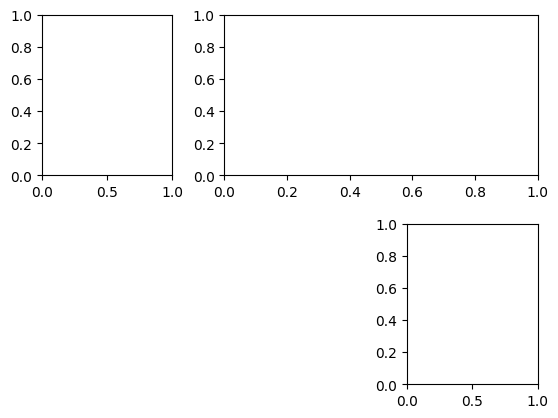

In [54]:


plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, 2]);

#### duas janelas diferentes
---

para que, com apenas um código, seja possível abrir duas ou mais janelas diferentes é necessário fazer como se mostra no exemplo:

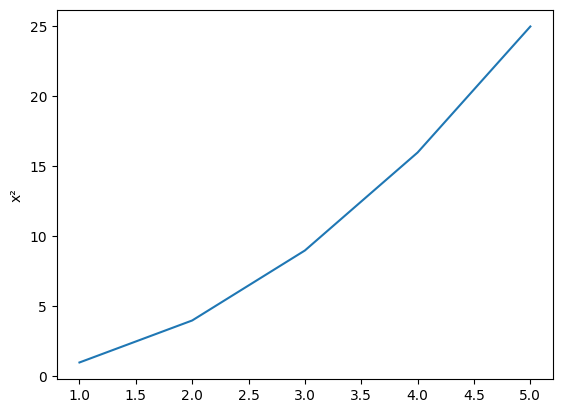

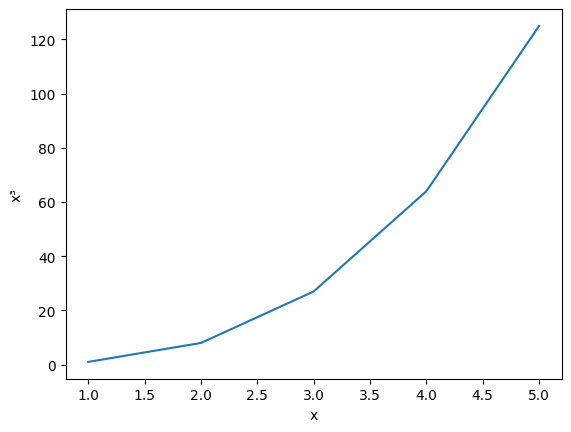

In [6]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(x, y2)
ax1.set_ylabel('x²')

ax2.plot(x, y3)
ax2.set_xlabel('x')
ax2.set_ylabel('x³')

plt.show()

observe que o código praticamente não muda quando este código é comparado com o código anterior, tendo sido acrescentado apenas os objetos `fig1` e `fig2`.

#### salvando os gráficos como png
---

neste caso, basta rodar as linhas de código
```
fig1.savefig(<nome1.png>)
fig2.savefig(<nome2.png>)
```